# MNIST Project
## JA Engelbrecht
### ADA

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import math

from functools import partial
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier

import keras
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout
from keras.layers import Conv2D, MaxPooling2D, Flatten
from keras.utils import to_categorical
from keras import backend as K
from keras.models import load_model
from keras.layers.normalization import BatchNormalization
from scipy.ndimage.interpolation import shift
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


### Variables to tweak

In [79]:
epochs = 1
batch_size = 128
num_classes = 10
img_rows, img_cols = 28, 28

### Data Preperation

In [4]:
MNIST_PATH =  "C:\\Users\\Josias\\Desktop\\ADA\\MNistProject\\digit-recognizer"

def load_mnist_train_data(mnist_path=MNIST_PATH):
    csv_path = os.path.join(mnist_path, "train.csv")
    csv_path
    return pd.read_csv(csv_path)

def load_mnist_test_data(mnist_path=MNIST_PATH):
    csv_path = os.path.join(mnist_path, "test.csv")
    csv_path
    return pd.read_csv(csv_path)

In [5]:
mnist_raw_train = load_mnist_train_data()
mnist_raw_test = load_mnist_test_data()

In [6]:
#Simple function, test variable 1 or 0 to indicate if it from the test data or or the train data. 
def create_data_X(mnist_raw_,test ):
    X = mnist_raw_
    if test != 1: 
        X = X.drop("label", axis=1)
    X = X.astype('float32')
    X /= 255
    X = X.values
    X = np.reshape(X, (X.shape[0], img_rows, img_cols, 1))
    return X

def create_data_y(mnist_raw_train, num_classes):
    y = mnist_raw_train.label
    y = to_categorical(y, num_classes)
    return y

### Initialize data
Considering reducing test size to 0.05...

In [7]:
X = create_data_X(mnist_raw_train,0)
X_test = create_data_X(mnist_raw_test,1)
y = create_data_y(mnist_raw_train,num_classes)
X, X_val, y, y_val = train_test_split(X,y,test_size=0.10, stratify=y)

### Inspect data

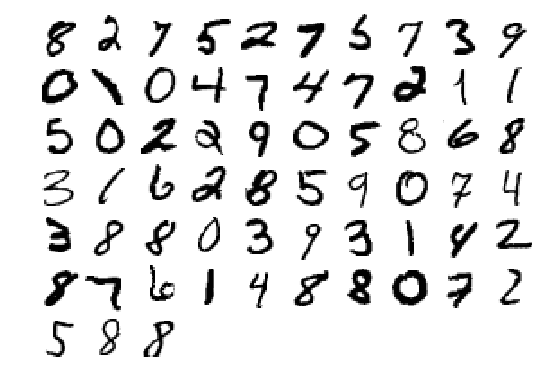

In [8]:
# From chapter 3: https://github.com/ageron/handson-ml/blob/master/03_classification.ipynb
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")
    
plt.figure(figsize=(9,9))
example_images = np.r_[X[:12000:600], X[13000:30600:600], X[30600:60000:590]]
plot_digits(example_images, images_per_row=10)
plt.show()

### Augment data
#### Changed roatation range from 15 to 10

In [9]:
##https://www.kaggle.com/yassineghouzam/introduction-to-cnn-keras-0-997-top-6
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images
datagen.fit(X)

### Creating Models

#### Model Library: 
##### Old Models:
deepdeep_valAcc_999.h5;
deepdeep_valAcc_9981.h5;
mnist_adam_elu_batchNorm.h5;
mnist_adam_elu_batchNorm_afterPool.h5;
mnist_adam_elu_batchNorm_augdata.h5;
mnist_adam_elu_batchNorm_deep.h5;
mnist_adam_elu_batchNorm_deep_v2.h5;
mnist_adam_elu_batchNorm_deep_v3.h5;
mnist_adam_elu_batchNorm_deep_v4.h5;
mnist_nadam_elu.h5;
mnist_nadam_elu_batchNorm_deeper_v1.h5;
mnist_nestrov_elu_batchNorm.h5
##### Newer Models:
model_1_v1;
model_2_v1;
model_3_v1;

### Models

In [10]:
#del model_1, model_2, model_3

In [11]:
#elu
def model_1(filt, dropout):
    my_Conv2D = partial(Conv2D, kernel_size = (3,3), activation='elu', padding='same')
    my_MaxPooling2D = partial(MaxPooling2D, pool_size = (2,2))
    
    model = Sequential()
    model.add(my_Conv2D(filters=filt, input_shape=(img_cols, img_rows, 1)))
    model.add(BatchNormalization())
    model.add(my_MaxPooling2D())
    model.add(Dropout(dropout))
    model.add(my_Conv2D(filters=2*filt))
    model.add(BatchNormalization())
    model.add(my_MaxPooling2D())
    model.add(Dropout(dropout))
    model.add(my_Conv2D(filters=2*filt))
    model.add(BatchNormalization())
    model.add(my_MaxPooling2D())
    model.add(Dropout(dropout))
    model.add(my_Conv2D(filters=2*filt))
    model.add(BatchNormalization())
    model.add(my_MaxPooling2D())
    model.add(Dropout(dropout))
    model.add(my_Conv2D(filters=2*filt))
    model.add(BatchNormalization())
    model.add(Dropout(dropout))
    model.add(Flatten())
    model.add(Dense(4*filt,activation='elu'))
    model.add(BatchNormalization())
    model.add(Dropout(2*dropout))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.sgd(momentum = 0.9, nesterov=True),
              metrics=['accuracy'])
    return model

#Relu
def model_2(filt, dropout):
    my_Conv2D = partial(Conv2D, kernel_size = (3,3), activation='relu', padding='same')
    my_MaxPooling2D = partial(MaxPooling2D, pool_size = (2,2))
    
    model = Sequential()
    model.add(my_Conv2D(filters=filt, input_shape=(img_cols, img_rows, 1)))
    model.add(BatchNormalization())
    model.add(my_MaxPooling2D())
    model.add(Dropout(dropout))
    model.add(my_Conv2D(filters=2*filt))
    model.add(BatchNormalization())
    model.add(my_MaxPooling2D())
    model.add(Dropout(dropout))
    model.add(my_Conv2D(filters=2*filt))
    model.add(BatchNormalization())
    model.add(my_MaxPooling2D())
    model.add(Dropout(dropout))
    model.add(my_Conv2D(filters=2*filt))
    model.add(BatchNormalization())
    model.add(my_MaxPooling2D())
    model.add(Dropout(dropout))
    model.add(my_Conv2D(filters=2*filt))
    model.add(BatchNormalization())
    model.add(Dropout(dropout))
    model.add(Flatten())
    model.add(Dense(4*filt,activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(2*dropout))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.sgd(momentum = 0.9, nesterov=True),
              metrics=['accuracy'])
    return model

#selu
def model_3(filt, dropout):
    my_Conv2D = partial(Conv2D, kernel_size = (3,3), activation='selu', padding='same')
    my_MaxPooling2D = partial(MaxPooling2D, pool_size = (2,2))
    
    model = Sequential()
    model.add(my_Conv2D(filters=filt, input_shape=(img_cols, img_rows, 1)))
    model.add(my_MaxPooling2D())
    model.add(Dropout(dropout))
    model.add(my_Conv2D(filters=2*filt))
    model.add(my_MaxPooling2D())
    model.add(Dropout(dropout))
    model.add(my_Conv2D(filters=2*filt))
    model.add(my_MaxPooling2D())
    model.add(Dropout(dropout))
    model.add(my_Conv2D(filters=2*filt))
    model.add(my_MaxPooling2D())
    model.add(Dropout(dropout))
    model.add(my_Conv2D(filters=2*filt))
    model.add(Dropout(dropout))
    model.add(Flatten())
    model.add(Dense(4*filt,activation='selu'))
    model.add(Dropout(2*dropout))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.sgd(momentum = 0.9, nesterov=True),
              metrics=['accuracy'])
    return model

In [12]:
#elu
#models_c -> less pooling, same as models_p, but different order. Additionally one extra dense fully
#connected layer is added before softmax
def model_1_c(filt, dropout):
    my_Conv2D = partial(Conv2D, kernel_size = (3,3), activation='elu', padding='same')
    my_MaxPooling2D = partial(MaxPooling2D, pool_size = (2,2))
    
    model = Sequential()
    model.add(my_Conv2D(filters=filt, input_shape=(img_cols, img_rows, 1)))
    model.add(BatchNormalization())
    model.add(Dropout(dropout))
    model.add(my_Conv2D(filters=2*filt))
    model.add(BatchNormalization())
    model.add(my_MaxPooling2D())
    model.add(Dropout(dropout))
    model.add(my_Conv2D(filters=2*filt))
    model.add(BatchNormalization())
    model.add(Dropout(dropout))
    model.add(my_Conv2D(filters=2*filt))
    model.add(BatchNormalization())
    model.add(Dropout(dropout))
    model.add(my_Conv2D(filters=2*filt))
    model.add(BatchNormalization())
    model.add(my_MaxPooling2D())
    model.add(Dropout(dropout))
    model.add(Flatten())
    model.add(Dense(4*filt,activation='elu'))
    model.add(BatchNormalization())
    model.add(Dropout(2*dropout))
    model.add(Dense(4*filt,activation='elu'))
    model.add(BatchNormalization())
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.sgd(momentum = 0.9, nesterov=True),
              metrics=['accuracy'])
    return model

#Relu
def model_2_c(filt, dropout):
    my_Conv2D = partial(Conv2D, kernel_size = (3,3), activation='relu', padding='same')
    my_MaxPooling2D = partial(MaxPooling2D, pool_size = (2,2))
    
    model = Sequential()
    model.add(my_Conv2D(filters=filt, input_shape=(img_cols, img_rows, 1)))
    model.add(BatchNormalization())
    model.add(Dropout(dropout))
    model.add(my_Conv2D(filters=2*filt))
    model.add(BatchNormalization())
    model.add(my_MaxPooling2D())
    model.add(Dropout(dropout))
    model.add(my_Conv2D(filters=2*filt))
    model.add(BatchNormalization())
    model.add(Dropout(dropout))
    model.add(my_Conv2D(filters=2*filt))
    model.add(BatchNormalization())
    model.add(Dropout(dropout))
    model.add(my_Conv2D(filters=2*filt))
    model.add(BatchNormalization())
    model.add(my_MaxPooling2D())
    model.add(Dropout(dropout))
    model.add(Flatten())
    model.add(Dense(4*filt,activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(2*dropout))
    model.add(Dense(4*filt,activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.sgd(momentum = 0.9, nesterov=True),
              metrics=['accuracy'])
    return model

#selu
def model_3_c(filt, dropout):
    my_Conv2D = partial(Conv2D, kernel_size = (3,3), activation='selu', padding='same')
    my_MaxPooling2D = partial(MaxPooling2D, pool_size = (2,2))
    
    model = Sequential()
    model.add(my_Conv2D(filters=filt, input_shape=(img_cols, img_rows, 1)))
    model.add(Dropout(dropout))
    model.add(my_Conv2D(filters=2*filt))
    model.add(my_MaxPooling2D())
    model.add(Dropout(dropout))
    model.add(my_Conv2D(filters=2*filt))
    model.add(Dropout(dropout))
    model.add(my_Conv2D(filters=2*filt))
    model.add(Dropout(dropout))
    model.add(my_Conv2D(filters=2*filt))
    model.add(my_MaxPooling2D())
    model.add(Dropout(dropout))
    model.add(Flatten())
    model.add(Dense(4*filt,activation='selu'))
    model.add(Dropout(2*dropout))
    model.add(Dense(4*filt,activation='selu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.sgd(momentum = 0.9, nesterov=True),
              metrics=['accuracy'])
    return model

### Initialize and train

In [44]:
del model_1, model_2, model_3, model_1_c, model_2_c, model_3_c

In [13]:
model_1 = model_1(64,0.25)
model_2 = model_2(64,0.25)
model_3 = model_3(64,0.25)

model_1_c = model_1_c(64,0.25)
model_2_c = model_2_c(64,0.25)
model_3_c = model_3_c(64,0.25)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [14]:
history_1   = []
history_2   = []
history_3   = []
history_1_c = []
history_2_c = []
history_3_c = []

In [96]:
history_1.append(model_1.fit_generator(datagen.flow(X, y, batch_size=batch_size),
          validation_data = (X_val, y_val),
          steps_per_epoch=len(X)/batch_size,
          epochs=epochs,
          verbose=1))

Epoch 1/1
296/295 [==============================] - 8s 26ms/step - loss: 0.0196 - acc: 0.9935 - val_loss: 0.0166 - val_acc: 0.9962


In [81]:
history_2.append(model_2.fit_generator(datagen.flow(X, y, batch_size=batch_size),
          validation_data = (X_val, y_val),
          steps_per_epoch=len(X)/batch_size,
          epochs=epochs,
          verbose=1))

Epoch 1/1
296/295 [==============================] - 8s 26ms/step - loss: 0.0162 - acc: 0.9948 - val_loss: 0.0137 - val_acc: 0.9967


In [106]:
history_3.append(model_3.fit_generator(datagen.flow(X, y, batch_size=batch_size),
          validation_data = (X_val, y_val),
          steps_per_epoch=len(X)/batch_size,
          epochs=epochs,
          verbose=1))

Epoch 1/1
296/295 [==============================] - 8s 28ms/step - loss: 0.0267 - acc: 0.9923 - val_loss: 0.0226 - val_acc: 0.9955


In [113]:
history_1_c.append(model_1_c.fit_generator(datagen.flow(X, y, batch_size=batch_size),
          validation_data = (X_val, y_val),
          steps_per_epoch=len(X)/batch_size,
          epochs=epochs,
          verbose=1))

Epoch 1/1
296/295 [==============================] - 20s 69ms/step - loss: 0.0092 - acc: 0.9968 - val_loss: 0.0204 - val_acc: 0.9957 - acc - ETA: 18s - loss: 0.0088 - ETA - ETA: 9s - l - ETA: 8s - loss: 0.0105  - ETA: 7s - loss: 0.0102 - acc: 0.996 - ETA: 7s - ETA: 5s - loss: 0.0096 - acc: 0 - ETA: 4s - loss: 0.0096 - acc: - ETA: 4s - loss: 0.0096 - acc: 0.996 - ETA: 4s - loss: 0.0095 - acc: 0.9 - ETA: 4s - loss: 0.0095 - acc: 0.996 - ETA: 4s - loss: 0.0095 - acc: - ET - ETA: 1s - loss: 0.0092 -  - ETA: 0s - loss: 0.0092 - ac


In [115]:
history_2_c.append(model_2_c.fit_generator(datagen.flow(X, y, batch_size=batch_size),
          validation_data = (X_val, y_val),
          steps_per_epoch=len(X)/batch_size,
          epochs=epochs,
          verbose=1))

Epoch 1/1
296/295 [==============================] - 20s 68ms/step - loss: 0.0084 - acc: 0.9969 - val_loss: 0.0123 - val_acc: 0.9960: 16s -  -  - ETA: 5s - loss: 0.0081 - acc: 0.996 - ETA: 5s - loss: 0.0081 - acc: 0 - ETA: 4s - loss: 0.0084 - acc - ETA: 4s - loss: 0.0086 - acc: 0 - ETA: 4s - - ETA: 2s - loss: 0.0 - ETA: 1s - loss: 0.0085 - acc: 0 - ETA: 0s - loss: 0.0085


In [119]:
history_3_c.append(model_3_c.fit_generator(datagen.flow(X, y, batch_size=batch_size),
          validation_data = (X_val, y_val),
          steps_per_epoch=len(X)/batch_size,
          epochs=epochs,
          verbose=1))

Epoch 1/1
296/295 [==============================] - 23s 77ms/step - loss: 0.0248 - acc: 0.9930 - val_loss: 0.0237 - val_acc: 0.9955


### Plot progress over epochs

In [21]:
def plot_histories(histories):
    acc = []
    val_acc = []
    for history in histories:
        for accuracy in history.history['acc']:
            acc.append(accuracy)
        for val_accuracy in history.history['val_acc']:
            val_acc.append(val_accuracy)       
    epochs = range(1, len(acc) + 1)
    plt.plot(epochs, acc, '--')
    plt.plot(epochs, val_acc)

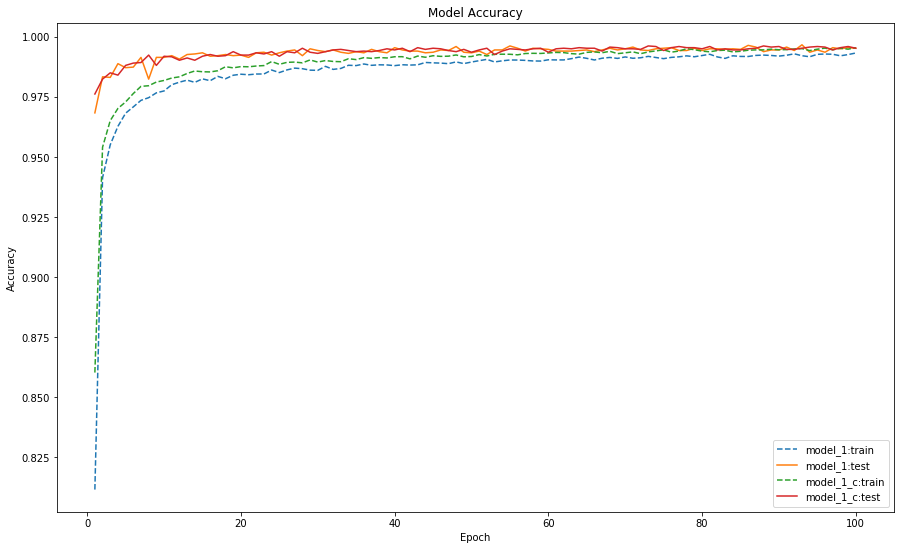

In [22]:
plt.figure(figsize=(15,9))
plot_histories(history_1)
plot_histories(history_1_c)
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['model_1:train', 'model_1:test','model_1_c:train',
            'model_1_c:test'], loc='lower right')
plt.show()

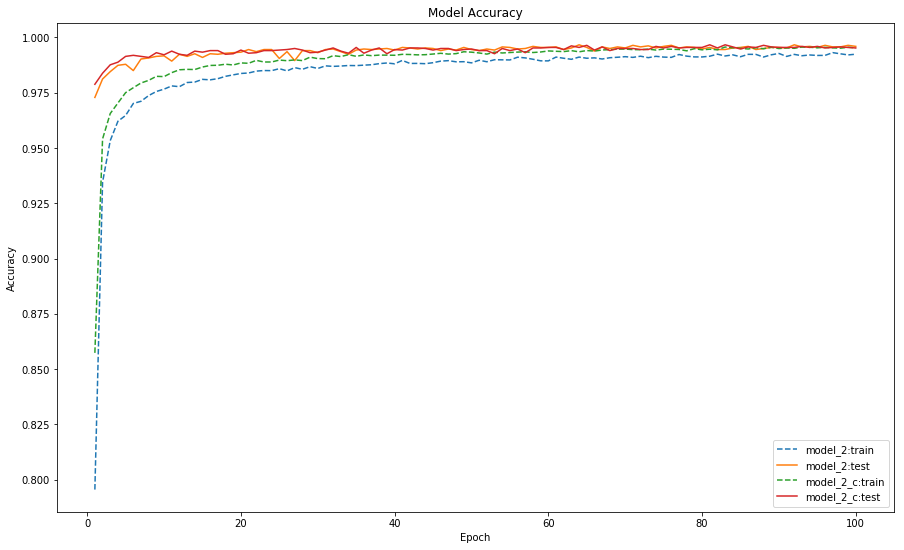

In [23]:
plt.figure(figsize=(15,9))
plot_histories(history_2)
plot_histories(history_2_c)
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['model_2:train', 'model_2:test','model_2_c:train',
            'model_2_c:test'], loc='lower right')
plt.show()

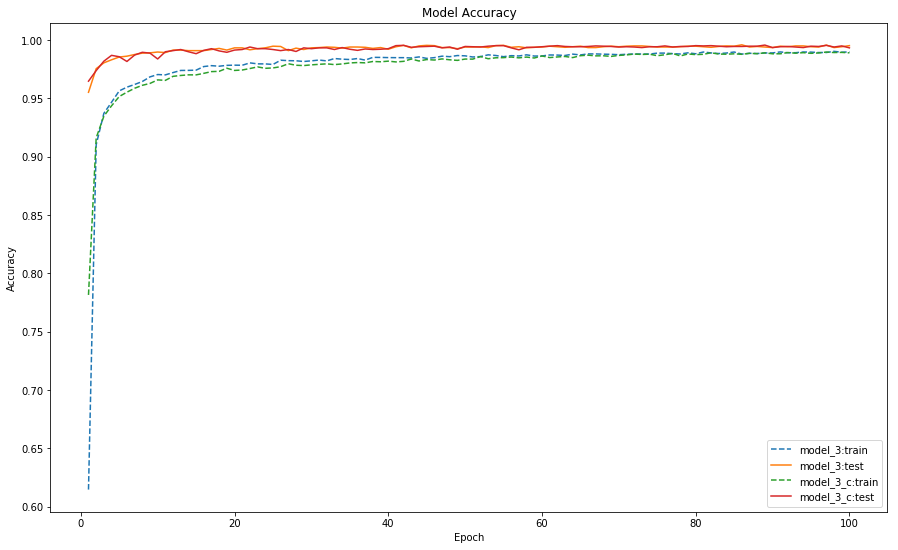

In [24]:
plt.figure(figsize=(15,9))
plot_histories(history_3)
plot_histories(history_3_c)
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['model_3:train', 'model_3:test','model_3_c:train',
            'model_3_c:test'], loc='lower right')
plt.show()

In [25]:
model_1.save('model_1_21.05')
model_2.save('model_2_21.05')
model_3.save('model_3_21.05')
model_1_c.save('model_1_c_21.05')
model_2_c.save('model_2_c_21.05')
model_3_c.save('model_3_c_21.05')

### Models Continued: Try reducing pooling layers...?

In [26]:
#elu
def model_1_p(filt, dropout):
    my_Conv2D = partial(Conv2D, kernel_size = (3,3), activation='elu', padding='same')
    my_MaxPooling2D = partial(MaxPooling2D, pool_size = (2,2))
    
    model = Sequential()
    model.add(my_Conv2D(filters=filt, input_shape=(img_cols, img_rows, 1)))
    model.add(BatchNormalization())
    model.add(my_MaxPooling2D())
    model.add(Dropout(dropout))
    model.add(my_Conv2D(filters=2*filt))
    model.add(BatchNormalization())
    model.add(my_MaxPooling2D())
    model.add(Dropout(dropout))
    model.add(my_Conv2D(filters=2*filt))
    model.add(BatchNormalization())
    model.add(Dropout(dropout))
    model.add(my_Conv2D(filters=2*filt))
    model.add(BatchNormalization())
    model.add(Dropout(dropout))
    model.add(my_Conv2D(filters=2*filt))
    model.add(BatchNormalization())
    model.add(Dropout(dropout))
    model.add(Flatten())
    model.add(Dense(4*filt,activation='elu'))
    model.add(BatchNormalization())
    model.add(Dropout(2*dropout))
    model.add(Dense(4*filt,activation='elu'))
    model.add(BatchNormalization())
    model.add(Dropout(2*dropout))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.sgd(momentum = 0.9, nesterov=True),
              metrics=['accuracy'])
    return model

#Relu
def model_2_p(filt, dropout):
    my_Conv2D = partial(Conv2D, kernel_size = (3,3), activation='relu', padding='same')
    my_MaxPooling2D = partial(MaxPooling2D, pool_size = (2,2))
    
    model = Sequential()
    model.add(my_Conv2D(filters=filt, input_shape=(img_cols, img_rows, 1)))
    model.add(BatchNormalization())
    model.add(my_MaxPooling2D())
    model.add(Dropout(dropout))
    model.add(my_Conv2D(filters=2*filt))
    model.add(BatchNormalization())
    model.add(my_MaxPooling2D())
    model.add(Dropout(dropout))
    model.add(my_Conv2D(filters=2*filt))
    model.add(BatchNormalization())
    model.add(Dropout(dropout))
    model.add(my_Conv2D(filters=2*filt))
    model.add(BatchNormalization())
    model.add(Dropout(dropout))
    model.add(my_Conv2D(filters=2*filt))
    model.add(BatchNormalization())
    model.add(Dropout(dropout))
    model.add(Flatten())
    model.add(Dense(4*filt,activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(2*dropout))
    model.add(Dense(4*filt,activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(2*dropout))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.sgd(momentum = 0.9, nesterov=True),
              metrics=['accuracy'])
    return model

#selu
def model_3_p(filt, dropout):
    my_Conv2D = partial(Conv2D, kernel_size = (3,3), activation='selu', padding='same')
    my_MaxPooling2D = partial(MaxPooling2D, pool_size = (2,2))
    
    model = Sequential()
    model.add(my_Conv2D(filters=filt, input_shape=(img_cols, img_rows, 1)))
    model.add(my_MaxPooling2D())
    model.add(Dropout(dropout))
    model.add(my_Conv2D(filters=2*filt))
    model.add(my_MaxPooling2D())
    model.add(Dropout(dropout))
    model.add(my_Conv2D(filters=2*filt))
    model.add(Dropout(dropout))
    model.add(my_Conv2D(filters=2*filt))
    model.add(Dropout(dropout))
    model.add(my_Conv2D(filters=2*filt))
    model.add(Dropout(dropout))
    model.add(Flatten())
    model.add(Dense(4*filt,activation='selu'))
    model.add(Dropout(2*dropout))
    model.add(Dense(4*filt,activation='selu'))
    model.add(Dropout(2*dropout))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.sgd(momentum = 0.9, nesterov=True),
              metrics=['accuracy'])
    return model

In [29]:
model_1_p = model_1_p(64,0.25)
model_2_p = model_2_p(64,0.25)
model_3_p = model_3_p(64,0.25)

#model_1_p = load_model('model_1_p_v1')
#model_2_p = load_model('model_2_p_v1')
#model_3_p = load_model('model_3_p_v1')
#model_old = load_model('deepdeep_augdata_0507.h5')

In [34]:
model_old = load_model('deepdeep_augdata_0507.h5')

In [120]:
history_1_p = model_1_p.fit_generator(datagen.flow(X, y, batch_size=batch_size),
          validation_data = (X_val, y_val),
          steps_per_epoch=len(X)/batch_size,
          epochs=epochs,
          verbose=1)

Epoch 1/1
296/295 [==============================] - 9s 32ms/step - loss: 0.0184 - acc: 0.9945 - val_loss: 0.0175 - val_acc: 0.9960 - ETA: 0s - loss: 0.0182 - acc: 0.99 - ETA: 0s - loss: 0.0185 - acc: 0


In [87]:
history_2_p = model_2_p.fit_generator(datagen.flow(X, y, batch_size=batch_size),
          validation_data = (X_val, y_val),
          steps_per_epoch=len(X)/batch_size,
          epochs=epochs,
          verbose=1)

Epoch 1/1
296/295 [==============================] - 9s 32ms/step - loss: 0.0176 - acc: 0.9943 - val_loss: 0.0183 - val_acc: 0.9960


In [126]:
history_3_p = model_3_p.fit_generator(datagen.flow(X, y, batch_size=batch_size),
          validation_data = (X_val, y_val),
          steps_per_epoch=len(X)/batch_size,
          epochs=epochs,
          verbose=1)

Epoch 1/1
296/295 [==============================] - 10s 34ms/step - loss: 0.0493 - acc: 0.9891 - val_loss: 0.0240 - val_acc: 0.99550504 - acc: - ETA: 6s - loss: 0.0531  - ETA: 6s - loss: 0 - ETA: 2s - loss: 0.0451 - acc: 0 - ETA: 2s - loss: 0.0455 - acc: 0.989 - ETA: 1s - loss: 0.0454 - acc: 0.989 - ETA: 1s - loss: 0.0456 - acc: 0. - ETA: 1s - loss: 0.0467 - acc: 0.989 - ETA: 1s - loss: 0.0467 - a - ETA: 0s - loss: 0.0492 - acc - ETA: 0s - loss: 0.0487 - acc:


In [241]:
history_old = model_old.fit_generator(datagen.flow(X, y, batch_size=batch_size),
          validation_data = (X_val, y_val),
          steps_per_epoch=len(X)/batch_size,
          epochs=epochs,
          verbose=1)

Epoch 1/5
296/295 [==============================] - 15s 52ms/step - loss: 0.0092 - acc: 0.9971 - val_loss: 0.0025 - val_acc: 0.9995TA: 10s - loss: 0.0105 - acc: 0.9 - ETA: 9s - loss: 0.0102 - acc: - ETA: 9s - loss: 0.0099 - acc: 0.996 - ETA: 9s - los - ETA: 6s - loss: 0.0096 - acc: - ETA: 2s -
Epoch 2/5
296/295 [==============================] - 15s 51ms/step - loss: 0.0080 - acc: 0.9977 - val_loss: 4.6582e-04 - val_acc: 0.9998
Epoch 3/5
296/295 [==============================] - 15s 52ms/step - loss: 0.0095 - acc: 0.9970 - val_loss: 0.0025 - val_acc: 0.9995: 2s - loss: 0.0089 -  - ETA: 0s - loss: 0.0089 - a
Epoch 4/5
296/295 [==============================] - 15s 52ms/step - loss: 0.0087 - acc: 0.9972 - val_loss: 0.0017 - val_acc: 0.9995s - loss - ETA: 8s - loss: 0.0099 - acc: 0 - ETA: 8s - loss: 0 - ETA: 6s - loss:  - ETA: 0s - loss: 0.0085 - acc: 0. - ETA: 0s - loss: 0.0085 - acc: 0
Epoch 5/5
296/295 [==============================] - 15s 51ms/step - loss: 0.0067 - acc: 0.9979 - va

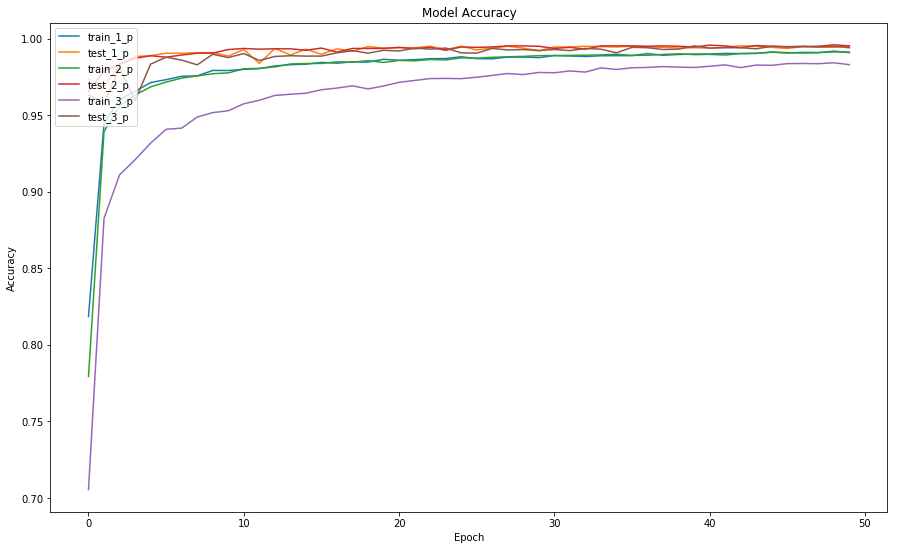

In [35]:
plt.figure(figsize=(15,9))
plt.plot(history_1_p.history['acc'])
plt.plot(history_1_p.history['val_acc'])
plt.plot(history_2_p.history['acc'])
plt.plot(history_2_p.history['val_acc'])
plt.plot(history_3_p.history['acc'])
plt.plot(history_3_p.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train_1_p', 'test_1_p','train_2_p', 'test_2_p','train_3_p', 'test_3_p'], loc='upper left')
plt.show()

In [36]:
model_1_p.save('model_1_p_21.05')
model_2_p.save('model_2_p_21.05')
model_3_p.save('model_3_p_21.05')

In [170]:
model_old.save('model_old_v1')

### Try Ensembles:

In [127]:
#models = [ model_1_p, model_2_p, model_3_p, model_old]
models = [model_1, model_2, model_1_p,
          model_2_p, model_3_p, model_1_c, model_2_c, model_3_c, model_old]

y_pred = ensemble(models, X_val)
accuracy_score(np.argmax(y_val, axis=1), y_pred)

0.996904761904762

In [38]:
def ensemble(models, X_val):
    #https://machinelearningmastery.com/model-averaging-ensemble-for-deep-learning-neural-networks/
    y_ensemble = [model.predict(X_val) for model in models]
    y_ensemble = np.array(y_ensemble)
    # sum across ensembles
    summed = np.sum(y_ensemble, axis=0)
    # argmax across classes
    outcomes = np.argmax(summed, axis=1)
    return outcomes

### Create Submissions

In [128]:
def create_submission(model, X_test,name):
    y_pred_final = model.predict_classes(X_test)
    string = 'C:\\Users\\Josias\\Desktop\\ADA\\MNistProject\\digit-recognizer\\'
    string = string + name + '.csv'
    df = pd.DataFrame({'ImageId': np.arange(len(y_pred_final))+1,'Label': y_pred_final})
    df.to_csv(string,
          index = None, header=True)

def create_submission_ensemble(y_pred, name):
    string = 'C:\\Users\\Josias\\Desktop\\ADA\\MNistProject\\digit-recognizer\\'
    string = string + name + '.csv'
    df = pd.DataFrame({'ImageId': np.arange(len(y_pred))+1,'Label': y_pred})
    df.to_csv(string,
          index = None, header=True)
    

y_test = ensemble(models, X_test)
create_submission_ensemble(y_test, 'ensemble_21.05_V4')

In [50]:
create_submission(model_old,X_test,'oldModel_21.05')